## Q-1 Find the runtime of the algorithm mathematically (I should see summations).

```
function x = f(n)
   x = 1;
   for i = 1:n         The outer loop runs from i = 1 to i = n, so it iterates n times
        for j = 1:n    For each iteration of the outer loop, the inner loop runs from j = 1 to j = n, so it also iterates n times
             x = x + 1;
```

$$
T(n) = \sum_{i=1}^{n} (\sum_{j=1}^{n} 1)
$$

$$
T(n) = \sum_{i=1}^{n} n
$$

$$
T(n) = n * n = n^2
$$


=> So runtime is **O(n^2)**


## Q-2 Time this function for various n e.g. n = 1,2,3.... You should have small values of n all the way up to large values. Plot "time" vs "n" (time on y-axis and n on x-axis). Also, fit a curve to your data, hint it's a polynomial. 


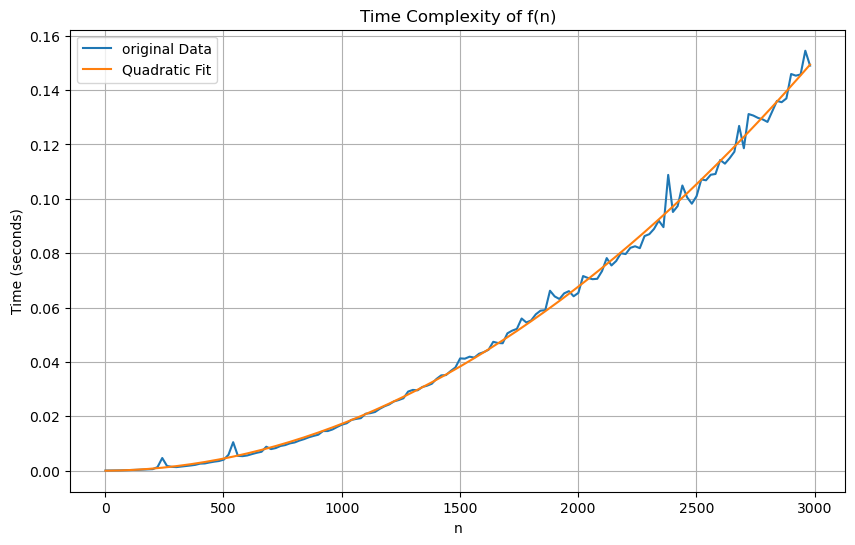

In [22]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def f(n):    # Given Function
    x = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x+1
    return x

n_values = range(1, 3000, 20)
times = []

for n in n_values:
    timer = timeit.Timer(lambda: f(n))
    execution_time = timer.timeit(number=10) / 10
    times.append(execution_time)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(n_values, times, label="original Data")
curve_coefficients = np.polyfit(n_values, times, 2)
fitted_curve = np.polyval(curve_coefficients, n_values)
plt.plot(n_values, fitted_curve, label='Quadratic Fit')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of f(n)')
plt.grid(True)
plt.legend()
plt.show()

## Q-3 Find polynomials that are upper and lower bounds on your curve from #2. From this specify a big-O, a big-Omega, and what big-theta is.

From the data collected in the plot, we will fit a polynomial of the form  $$ T(n) = a \cdot n^2 $$, which will represent our curve. The upper and lower bounds can be approximated by constants multiplying the  n^2  term.

**Big-O**: Since the function grows quadratically, we can say  $$ O(n^2) $$

**Big-Omega**: The lower bound is also quadratic, so  $$ \Omega(n^2) $$

**Big-Theta**: Since both the upper and lower bounds are quadratic,  $$ \Theta(n^2) $$

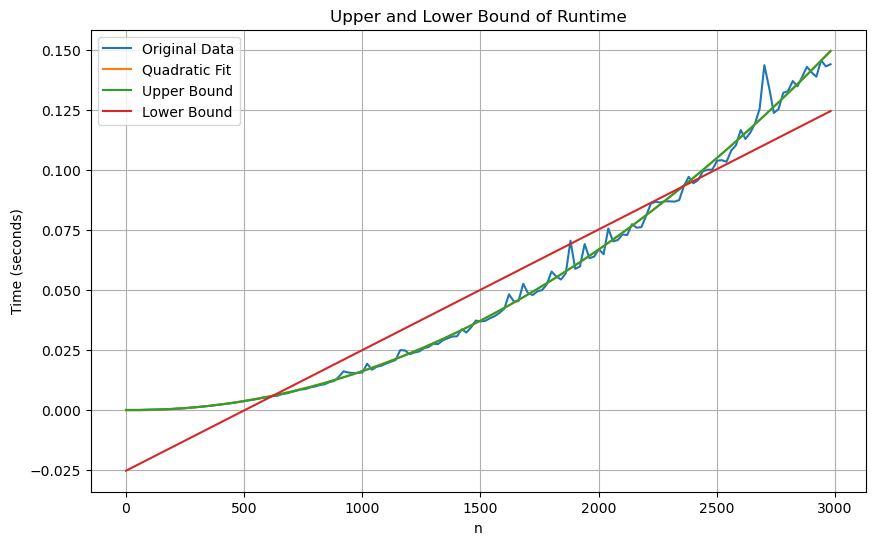

In [25]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def f(n):    # Given Function
    x = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x+1
    return x

n_values = range(1, 3000, 20)
times = []

for n in n_values:
    timer = timeit.Timer(lambda: f(n))
    execution_time = timer.timeit(number=10) / 10
    times.append(execution_time)


quadratic_coefficients = np.polyfit(n_values, times, 2)
fitted_quadratic_curve = np.polyval(quadratic_coefficients, n_values)

cubic_coefficients = np.polyfit(n_values, times, 3)
upper_bound_curve = np.polyval(cubic_coefficients, n_values)
upper_bound_expression = np.poly1d(cubic_coefficients)

linear_coefficients = np.polyfit(n_values, times, 1)
lower_bound_curve = np.polyval(linear_coefficients, n_values)
lower_bound_expression = np.poly1d(linear_coefficients)


# Plot the results
plt.figure(figsize=(10,6))
plt.plot(n_values, times, label="Original Data")
plt.plot(n_values, fitted_quadratic_curve, label='Quadratic Fit')
plt.plot(n_values, upper_bound_curve, label='Upper Bound')
plt.plot(n_values, lower_bound_curve, label='Lower Bound')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Upper and Lower Bound of Runtime')
plt.grid(True)
plt.legend()
plt.show()

## Q-4 Find the approximate (eye ball it) location of "n_0" . Do this by zooming in on your plot and indicating on the plot where n_0 is and why you picked this value. Hint: I should see data that does not follow the trend of the polynomial you determined in #2.

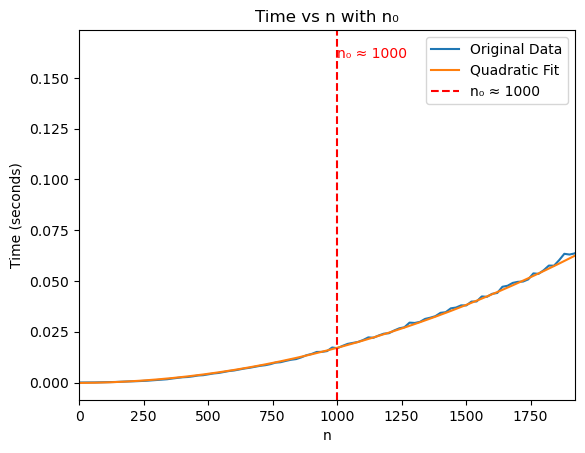

In [27]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def f(n):    # Given Function
    x = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x+1
    return x

n_values = range(1, 3000, 20)
times = []

for n in n_values:
    timer = timeit.Timer(lambda: f(n))
    execution_time = timer.timeit(number=10) / 10
    times.append(execution_time)

quadratic_coefficients = np.polyfit(n_values, times, 2)
fitted_quadratic_curve = np.polyval(quadratic_coefficients, n_values)

# Plot the results
plt.plot(n_values, times, label='Original Data') 
plt.plot(n_values, fitted_quadratic_curve, label='Quadratic Fit') 

# Observation, n₀ ≈ 1000
n_0 = 1000
plt.axvline(x=n_0, color='red', linestyle='--', label=f'n₀ ≈ {n_0}')
plt.text(n_0, np.max(times), f'n₀ ≈ {n_0}', color='red', verticalalignment='top')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time vs n with n₀')
plt.legend()
plt.xlim(0, max(n_values) // 1.55)
plt.show()

```
If I modified the function to be:
x = f(n)
   x = 1;
   y = 1;
   for i = 1:n
        for j = 1:n
             x = x + 1;
        y = i + j;
```

#### 4 Will this increase how long it takes the algorithm to run (e.x. you are timing the function like in #2)? 

=> The additional line of code will slightly increase the algorithm’s runtime, but the impact is minimal and negligible since it introduces only a constant time operation within the inner loop.

#### 5 Will it effect your results from #1?

=> In terms of time complexity, this function will still be  O(n^2) , because the nested loops remain the same, and the additional statement y = i + j; does not change the order of growth of the algorithm. The runtime might slightly increase due to the extra operation, but it will not affect the overall time complexity class.

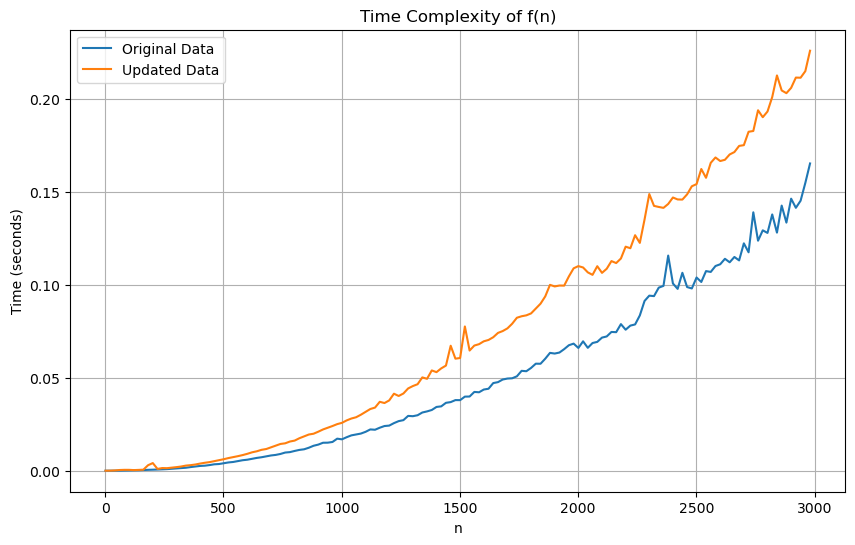

In [37]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def f(n):    # Given Function
    x = 1
    y = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x + 1
            y = i + j
    return x    

n_values = range(1, 3000, 20)
updated_times = []

for n in n_values:
    timer = timeit.Timer(lambda: f(n))
    execution_time = timer.timeit(number=10) / 10
    updated_times.append(execution_time)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(n_values, times, label='Original Data')
plt.plot(n_values, updated_times, label='Updated Data')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of f(n)')
plt.grid(True)
plt.legend()
plt.show()

## Q-6 Implement merge sort, show/test it on the array [5,2,4,7,1,3,2,6].

In [31]:
def merge(arr, low, mid, high):
    temp = []  
    left = low
    right = mid + 1

    while left <= mid and right <= high:
        if arr[left] <= arr[right]:
            temp.append(arr[left])
            left += 1
        else:
            temp.append(arr[right])
            right += 1

    while left <= mid:
        temp.append(arr[left])
        left += 1

    while right <= high:
        temp.append(arr[right])
        right += 1

    for i in range(low, high + 1):
        arr[i] = temp[i - low]

def merge_sort(arr, low, high):
    if low >= high:
        return
    mid = (low + high) // 2
    merge_sort(arr, low, mid)
    merge_sort(arr, mid + 1, high)
    merge(arr, low, mid, high)

if __name__ == "__main__":
    arr = [5, 2, 4, 7, 1, 3, 2, 6]
    n = len(arr)
    merge_sort(arr, 0, n - 1)
    print("Sorted Array:")
    print(arr)

Sorted Array:
[1, 2, 2, 3, 4, 5, 6, 7]
